<a href="https://colab.research.google.com/github/hida0/ESAA/blob/HW/Week17_HW1_%EA%B3%A0%EA%B0%9D_%EC%84%B8%EA%B7%B8%EB%A8%BC%ED%85%8C%EC%9D%B4%EC%85%98_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 개념 정리 & 필사
(파이썬 머신러닝 완벽가이드  ch7. 6 pg. 452~465)

### 1. 고객 세그먼테이션의 정의와 기법
- **고객 세그먼테이션**(Customer Segmentation)은 **다양한 기준으로 고객을 분류하는 기법**으로, CRM이나 마케팅의 중요 기반 요소이다.
- 고객을 분류하는 요소로 지역/결혼여부/성별/소득과 같이 개인의 신상 데이터가 사용될 수도 있으나, 고객 분류가 사용되는 대부분의 비즈니스가 **상품 판매**에 중점을 두고 있기 때문에 더 중요한 분류 요소는 **어떤 상품을 얼마나 많은 비용을 써서 얼마나 자주 사용하는가**에 기반한 정보로 분류하는 것이 보통이다. 기업 입장에서는 **얼마나 많은 매출이 발생하느냐가 고객 기준을 정하는 중요한 요소**이다.
- 고객 세그먼테이션의 주요 목표는 **타겟 마케팅**이다. 타겟 마케팅이란 **고객을 여러 특성에 맞게 세분화**해서, 그 **유형에 따라 맞춤형 마케팅이나 서비스를 제공**하는 것이다.
- 고객 세그먼테이션은 **고객의 어떤 요소를 기반으로 군집화할 것인가를 결정**하는 것이 중요한데, 여기서는 기본적인 고객 분석 요소인 RFM 기법을 이용한다.
- **RFM** 기법은 **가장 최근 상품 구입 일로부터 오늘까지의 기간**인 **Recency**(R), **상품의 구매 횟수**인 **Frequency**(F), **총 구매 금액**인 **Monetary Value**(M)의 각 앞글자를 합한 것이다.

### 2. 고객 세그먼테이션 군집화 실습 - 온라인 판매 데이터 전처리
- 온라인 판매 데이터를 이용하여 고객 세그먼테이션을 군집화 기반으로 수행한다.
- 이 데이터 세트는 제품 주문 데이터 세트로, Invoice(주문 번호)+StockCode(제품 코드)를 기반으로 주문량, 주문 일자, 제품 단가, 주문 고객 번호, 주문 고객 국적 등의 칼럼으로 구성되어 있다.
 - InvoiceNo: 주문 번호, 'C'로 시작하는 것은 취소 주문
 - StockCode: 제품 코드
 - Description: 제품 설명
 - Quantity: 주문 제품 건수
 - InvoiceDate: 주문 일자
 - UnitPrice: 제품 단가
 - CustomerID: 고객 번호
 - Country: 주문 고객의 국적
- 전체 데이터는 541909개이다. CustomerID의 Null이 135000개로 매우 많으며, 다른 칼럼의 경우에도 오류 데이터가 존재하므로 전처리 작업이 필요하다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_csv("/content/drive/MyDrive/ESAA/data/Online Retail.csv")
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom


In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 2. 고객 세그먼테이션 군집화 실습 - 온라인 판매 데이터 전처리
1. **Null 데이터 제거** : 특히 CustomerID 칼럼에 Null 데이터가 많다. 고객 세그먼테이션을 수행할 것이기 때문에 고객 식별 번호가 없는 데이터는 필요 없으므로 삭제한다.
2. **오류 데이터 삭제** : 대표적인 오류 데이터는 Quantity 또는 UnitPrice가 0보다 작은 경우이다. Quantity가 0보다 작은 경우는 반환된 제품을 뜻하는 것으로, 이 경우 InvoiceNo의 앞자리는 'C'로 되어 있다. 분석의 효율성을 위해서 이 데이터를 모두 삭제한다.
- 불린 인덱싱을 적용하여 Quantity > 0, UnitPrice > 0이고, CustomerID가 Not Null인 값만 다시 필터링한다.
---
- Country 칼럼은 주문 고객의 국적을 나타낸다. 주요 주문 고객은 영국인데, 이 외에도 EU의 여러 나라와 영연방 국가들이 포함되어 있다.
- 영국이 대다수를 차지하므로 다른 국가의 데이터는 모두 제외한다.
- 전처리를 마친 최종 데이터는 354321건이다.

In [ ]:
retail_df = retail_df[retail_df['Quantity']>0]
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [ ]:
retail_df= retail_df[retail_df['Country']=='United Kingdom']
retail_df.shape

(354321, 8)

### 3. RFM 기반 데이터 가공
- 고객 세그먼테이션 군집화를 RFM 기반으로 수행하기 위해 필요한 데이터를 가공한다.
- 먼저 'UnitPrice'와 'Quantity'를 곱하여 주문 금액 데이터를 만든다. 또 CustomerID도 더 편리한 식별성을 위해 float형을 int형으로 변경한다.
- 해당 온라인 판매 데이터 세트는 주문 건수와 주문 금액이 압도적으로 특정 고객에게 많은 특성을 가지고 있는데, 개인 고객의 주문과 소매점의 주문이 함께 포함되어 있기 때문이다.
- Top 5 주문 건수와 주문 금액을 가진 고객 데이터를 추출하여 살펴보면, 몇몇 특정 고객이 많은 주문 건수와 주문 금액을 가지고 있다.
---
- 해당 온라인 판매 데이터 세트는 전형적인 판매 데이터 세트와 같이 주문번호(InvoiceNo)+상품코드(StockCode) 레벨의 식별자로 되어 있다.
- InvoiceNo+StockCode로 `groupby`를 수행하면 거의 1에 가깝게 유일한 식별자 레벨이 된다는 것을 알 수 있다.

In [ ]:
# 제품 단가x주문 제품 건수를 곱하여 주문 금액 데이터를 생성
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']

# float형을 int형으로 변경
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [ ]:
# 주문 건수 Top 5
retail_df['CustomerID'].value_counts().head(5)

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64

In [ ]:
# 주문 금액 Top 5
retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5]

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64

In [ ]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count()

InvoiceNo  StockCode
536365     21730        1
           22752        1
           71053        1
           84029E       1
           84029G       1
                       ..
581585     84946        1
581586     20685        1
           21217        1
           22061        1
           23275        1
Name: InvoiceNo, Length: 344435, dtype: int64

In [ ]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

### 3. RFM 기반 데이터 가공
- 그러나 지금 수행하려는 RFM 기반의 고객 세그먼테이션은 고객 레벨로 주문 기간, 주문 건수, 주문 금액 데이터를 기반으로 하여 세그먼테이션을 수행하는 것이므로, **주문 번호+상품 코드 기준의 데이터를 고객 기준의 주문 기간**(Recency), **주문 건수**(Frequency), **주문 금액**(Monetary Value) **데이터로 변경**한다.
- 이를 위해서는 주문 번호 기준의 기존 데이터를, **개별 고객 기준의 데이터로 groupby** 해야 한다.
---
- 주문 번호 기준의 retail_df DataFrame에 groupby('CustomerID')를 적용하여 개별 고객 기준으로 DataFrame을 새롭게 생성한다.
- DataFrame의 **`groupby( )`**만 사용해서는 **서로 다른 여러 개의 aggregation 연산을 한번에 수행하기 어려우므로**, 이를 해결하기 위해 DataFrame에 groupby를 호출하여 반환된 **DataFrameGroupby** 객체에 **`agg( )`**를 이용한다.
- **`agg( )`**에 인자로 **대상 칼럼들과 aggregation 함수명들을 딕셔너리 형태로 입력**하면 여러 개의 칼럼에 서로 다른 aggregation 연산을 쉽게 수행할 수 있다.
- **Recency**는  **CustomerID로 groupby( )**해서 **InvoiceDate의 max( )**로 고객별 가장 최근 주문 일자를 먼저 구한 뒤 추후 별도의 가공 작업을 수행한다.
- **Frequency**는 고객별 주문 건수이므로 **CustomerID로 groupby( )**해서 **InvoiceNo의 count( )** aggregation으로 구한다.
- **Monetary Value**는 고객별 주문 금액이므로  **CustomerID로 groupby( )**해서 **sale_amount의 sum( )** aggregation으로 구한다.



In [ ]:
# DataFrame의 groupby()의 multiple 연산을 위해 agg()를 이용
# Recency는 InvoiceDate 칼럼의 max()에서 데이터를 가공
# Frequency는 InvoiceNo 칼럼의 count(), Monetary Value는 sale_amount 칼럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount': 'sum'
}

cust_df = retail_df.groupby('CustomerID').agg(aggregations)
cust_df.head(3)

,InvoiceDate,InvoiceNo,sale_amount
CustomerID,,,
12346,2011-01-18 10:01,1,77183.60
12747,2011-12-07 14:34,103,4196.01
12748,2011-12-09 12:20,4595,33719.73


In [ ]:
# groupby된 결과 칼럼 값을 Recency, Frequency, Monetary Value로 변경
cust_df = cust_df.rename(columns={'InvoiceDate': 'Recency',
                                  'InvoiceNo': 'Frequency',
                                  'sale_amount': 'Monetary'})

# index인 CustomerID를 칼럼으로 생성
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01,1,77183.60
1,12747,2011-12-07 14:34,103,4196.01
2,12748,2011-12-09 12:20,4595,33719.73


### 3. RFM 기반 데이터 가공
- Recency 칼럼은 개별 고객당 가장 최근의 주문인데, 데이터 값의 특성으로 인해 추가적인 데이터 가공이 필요하다.
- Recency는 고객이 가장 최근에 주문한 날짜를 기반으로 하는데, 이는 오늘 날짜를 기준으로 가장 최근 주문 일자를 뺀 날짜입니다. 
- 주의할 점은 오늘 날짜는 현재 날짜가 아니라는 것이다. 온라인 판매 데이터가 2010년 12월 1일에서 2011년 12월 9일까지의 데이터이므로 오늘 날짜는 마지막 날에서 하루를 더한 2011년 12월 10일로 한다.
- 2011년 12월 10일을 현재 날짜로 간주하고 가장 최근의 주문 일자를 뺀 데이터에서 일자 데이터(days)만 추출하여 생성한다.
---
- 이제 고객별로 RFM 분석에 필요한 Recency, Frequency, Monetary 칼럼을 모두 생성하였다.
- 다음으로 생성된 고객 RFM 데이터 세트의 특성을 개괄적으로 알아보고, RFM 기반에서 고객 세그먼테이션을 수행한다.

In [ ]:
import datetime as dt
cust_df['Recency'] = pd.to_datetime(cust_df['Recency'])
cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print("cust_df 로우와 칼럼 건수는 ", cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


### 4. RFM 기반 고객 세그먼테이션
- 온라인 판매 데이터 세트는 소매업체의 대규모 주문을 포함하고 있다. 이들은 주문 건수와 주문 금액에서 개인 고객의 주문과 매우 큰 차이를 나타내고 있어서, 이로 인해 매우 **왜곡된 데이터 분포도**를 가지게 되어 **군집화가 한쪽 군집에만 집중되는 현상**이 발생한다.
- 먼저 온라인 판매 데이터 세트의 칼럼별 히스토그램을 확인하고, 이처럼 왜곡된 데이터 분포도에서 군집화를 수행할 때 어떤 현상이 발생하는지 알아본다.
- `matplotlib`의 **`hist( )`**를 이용하여 **'Recency', 'Frequency', 'Monetary' 칼럼의 분포 히스토그램**을 확인한다.
- Recency, Frequency, Monetary 3개의 칼럼 모두 왜곡된 데이터 값의 분포도를 가지고 있으며, 특히 Frequency, Monetary의 경우 특정 범위에 값이 몰려 있어서 왜곡 정도가 매우 심하다는 것을 알 수 있다.
---
- **`describe( )`**메서드로 각 칼럼의 데이터 값 백분위로 대략적으로 어떻게 값이 분포되어 있는지 확인한다.
- 세 칼럼 모두 매우 큰 상위 몇개의 값으로 인해 평균이 중위값 또는 3분위수보다 매우 크게 나타난다는 것을 알 수 있다.

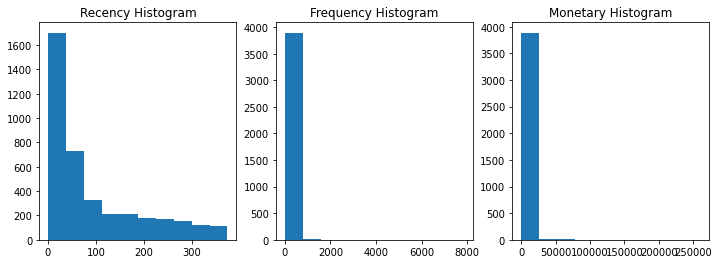

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)
ax1.set_title("Recency Histogram")
ax1.hist(cust_df['Recency'])

ax2.set_title("Frequency Histogram")
ax2.hist(cust_df['Frequency'])

ax3.set_title("Monetary Histogram")
ax3.hist(cust_df['Monetary'])

plt.show()

In [ ]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


### 4. RFM 기반 고객 세그먼테이션
- 이와 같이 왜곡 정도가 매우 높은 데이터 세트에 K-평균 군집을 적용하면, 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행된다.
- 먼저 데이터 세트를 **`StandardScaler`**를 이용하여 **평균과 표준편차를 재조정**한 다음, K-평균 군집화를 수행한다.
- 군집을 3개로 구성할 경우, 전체 군집의 평균 실루엣 계수인 실루엣 스코어는 0.592로 안정적인 수치가 나왔다.
---
- 군집 개수별 실루엣 계수를 구하는 함수와 군집화 구성을 시각화하는 함수를 정의하고, 군집 개수를 [2, 3, 4, 5]로 변화시키면서 개별 군집의 실루엣 계수 값과 데이터 구성을 확인한다.

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

# K-평균 군집화
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels
print("실루엣 스코어 : {0:.3f}".format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어 : 0.592


In [ ]:
def visualize_silhouette(cluster_lists, X_features): 
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.cm as cm
    import math
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, 
                                   ith_cluster_sil_values, facecolor=color, 
                                   edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

def visualize_kmeans_plot_multi(cluster_lists, X_fetaures):
  from sklearn.cluster import KMeans
  from sklearn.decomposition import PCA

  n_cols = len(cluster_lists)
  fig, axs = plt.subplots(figsize=(4*n_cols,4), nrows=1, ncols=n_cols)

  pca = PCA(n_components=2)
  pca_transformed = pca.fit_transform(X_features)
  dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])

  for ind, n_cluster in enumerate(cluster_lists):
    clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
    cluster_labels = clusterer.fit_predict(pca_transformed)
    dataframe['cluster']=cluster_labels
    unique_labels = np.unique(clusterer.labels_)
    markers=['o', 's', '^', 'x', '*']

    for label in unique_labels:
      label_df = dataframe[dataframe['cluster']==label]
      if label == -1:
        cluster_legend = 'Noise'
      else:       
        cluster_legend = 'Cluster' + str(label)
      
      axs[ind].scatter(x=label_df['PCA1'],y=label_df['PCA2'],s=70, 
                       edgecolor='k', marker=markers[label], label=cluster_legend)
      axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
      axs[ind].legend(loc='upper right')
plt.show()

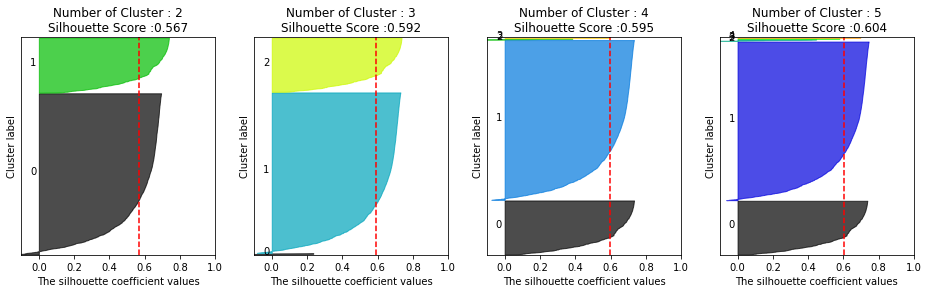

In [ ]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)

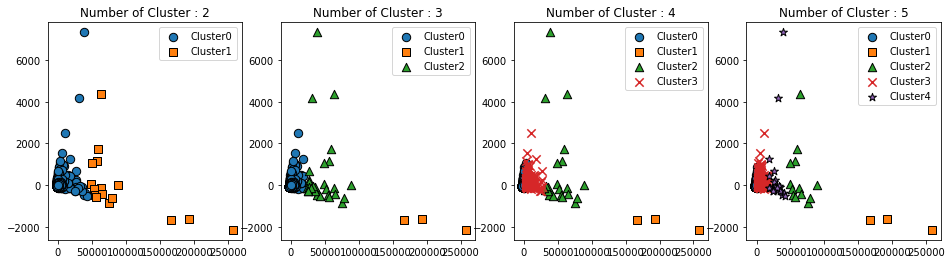

In [ ]:
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)

### 4. RFM 기반 고객 세그먼테이션
- 출력 결과를 살펴보면, 군집이 2개일 경우 0번 군집과 1번 군집이 너무 개괄적으로 군집화되었다.
- 군집이 3개 이상일 때부터는 데이터 세트의 개수가 너무 작은 군집이 만들어진다. 이 군집에 데이터는 개수가 작을뿐더러 실루엣 계수 역시 상대적으로 매우 작으며, 군집 내부에서도 데이터가 광범위하게 퍼져 있다.
- 군집이 3개일 경우 0번 군집의 데이터 건수가 매우 작고, 4개일 경우 2번과 3번 군집이, 5개일 경우 2번, 3번,  4번 군집에 속한 데이터 건수가 너무 적고 광범위하게 퍼져 있다.
- 이 소수의 데이터 세트는 바로 앞에서 언급한 **왜곡된 데이터 값**인 **특정 소매점의 대량 주문 구매 데이터**이다. 이 경우는 데이터 값이 **거리 기반으로 광범위하게 퍼져 있어서**, 군집수를 계속 늘려도 **이 군집만 지속적으로 분리하기 때문에 의미없는 군집화 결과**로 이어지게 된다.
- 이처럼 **지나치게 왜곡된 데이터 세트**는 **K-평균과 같은 거리 기반 군집화 알고리즘**에서 **지나치게 일반적인 군집화 결과**를 도출하게 된다.

### 4. RFM 기반 고객 세그먼테이션
- 비지도학습 알고리즘의 하나인 **군집화의 기능적 의미는 숨어있는 새로운 집단을 발견하는 것**이다.
- 새로운 군집 내의 데이터 값을 분석하고 이해함으로써 이 집단에 새로운 의미를 부여할 수 있으며, 이를 통해 전체 데이터를 다른 각도로 바라볼 수 있게 만들어준다.
- 데이터 세트의 **왜곡 정도를 낮추기 위해** 가장 자주 사용되는 방법은 데이터 값에 로그(Log)를 적용하는 **로그 변환**이다.
- 온라인 판매 데이터 세트의 왜곡 정도를 낮추기 위해 전체 데이터를 로그 변환한 뒤에 K-평균 알고리즘을 적용하고 결과를 비교한다.
---
- 실루엣 스코어는 0.303으로 로그 변환하기 전보다 떨어진다.
- 하지만 실루엣 스코어의 절대치가 중요한 것이 아님을 앞의 예제를 통해 알 수 있으며, 어떻게 개별 군집이 더 균일하게 나뉠 수 있는지가 더 중요하다.
- 앞서 정의한 함수를 이용하여 로그 변환한 데이터 세트를 기반으로 실루엣 계수와 군집화 구성을 시각화한다.

In [ ]:
# Recency, Frequency, Monetary 칼럼에 np.log1p()을 이용하여 로그 변환
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# 로그 변환 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

# K-평균 군집화
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels
print("실루엣 스코어 : {0:.3f}".format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어 : 0.303


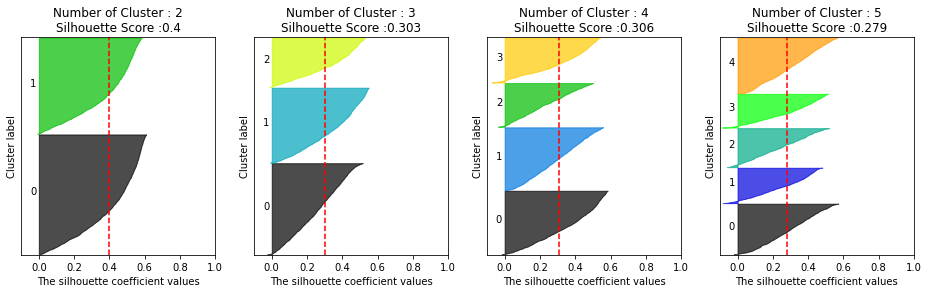

In [ ]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)

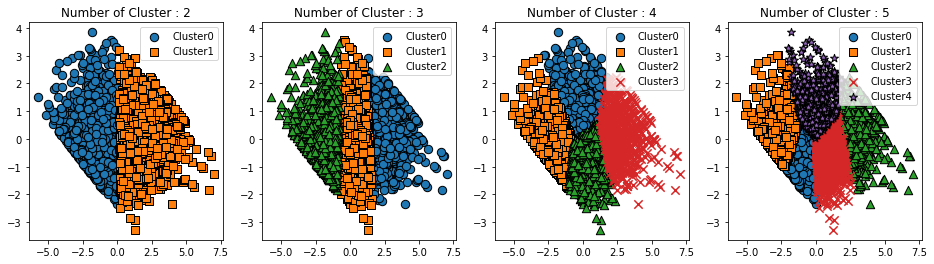

In [ ]:
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)